<a href="https://colab.research.google.com/github/rrlamb/MLReadingHandWrittenNumbers/blob/main/MachineLearningToReadHandWrittenNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
test_structure = pd.read_csv("/content/drive/MyDrive/data/mnist/mnist_test.csv")
train_structure = pd.read_csv("/content/drive/MyDrive/data/mnist/mnist_train.csv")

##Exploring datasets


In [ ]:
print(f'train_structure shape: {train_structure.shape}')
print(f'test_structure shape: {test_structure.shape}')

train_structure shape: (60000, 785)
test_structure shape: (10000, 785)


In [ ]:
train_structure.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('TRAIN DATA')
train_structure.info()
print('\nTEST DATA')
test_structure.info()

TRAIN DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB

TEST DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


##Partitioning training dataset into a training dataset and a validation dataset.


In [ ]:
from sklearn.model_selection import train_test_split

train_set, train_validation_set = train_test_split(train_structure, test_size=0.2, random_state=42)

##Partitioning training dataset into a label dataset and a feature dataset.  


In [ ]:
train_label = train_set['label']
train_image = train_set.drop('label', axis=1) / 255
train_image = train_image.to_numpy()
train_label = train_label.to_numpy()
train_image = train_image.reshape(48000, 28, 28)

In [ ]:
train_validation_label = train_validation_set['label']
train_validation_image = train_validation_set.drop('label', axis=1) / 255
train_validation_image = train_validation_image.to_numpy()
train_validation_label = train_validation_label.to_numpy()
train_validation_image = train_validation_image.reshape(12000, 28, 28)

In [ ]:
test_label = test_structure['label']
test_image = test_structure.drop('label', axis=1) / 255
test_image = test_image.to_numpy()
test_label = test_label.to_numpy()
test_image = test_image.reshape(10000, 28, 28)

##Generating a display (graphic) of a few of the training data instances.


Training Label: 5


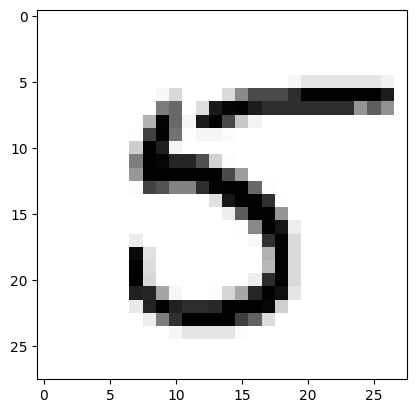

In [ ]:
plt.imshow(train_image[0], cmap='Greys')
print(f'Training Label: {train_label[0]}')

Training Label: 8


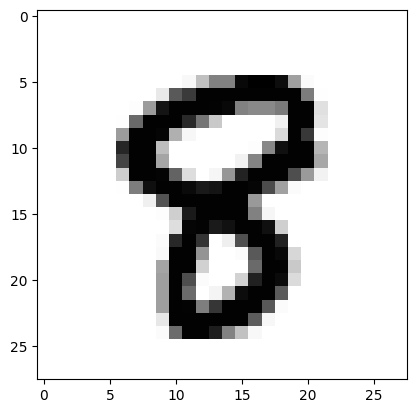

In [ ]:
plt.imshow(train_image[12], cmap='Greys')
print(f'Training Label: {train_label[12]}')

Training Label: 1


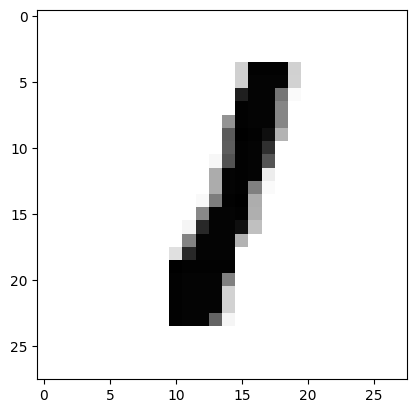

In [ ]:
plt.imshow(train_image[2], cmap='Greys')
print(f'Training Label: {train_label[2]}')

##Defining a neural network model


In [ ]:
model_layers = [
  layers.Input((28, 28)),
  layers.Flatten(), # comment this line to see what the summary looks like when you don't flatten the input
  layers.Dense(20, activation='relu'),
  layers.Dense(10, activation='softmax')
]

model = tf.keras.models.Sequential(model_layers)

##Compiling the model


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Training model using the training data and the validation data.


In [ ]:
history = model.fit(train_image, train_label, epochs=10, batch_size=128, validation_data=(train_validation_image, train_validation_label))

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9905 - val_loss: 0.2036 - val_accuracy: 0.9532
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9907 - val_loss: 0.2006 - val_accuracy: 0.9542
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.2055 - val_accuracy: 0.9538
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.9911 - val_loss: 0.2057 - val_accuracy: 0.9541
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0325 - accuracy: 0.9912 - val_loss: 0.2052 - val_accuracy: 0.9542
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0322 - accuracy: 0.9912 - val_loss: 0.2126 - val_accuracy: 0.9517
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9917 - val_loss: 0.2043 - val_accuracy: 0.9532
Epoch 

##Displaying performance statistics produced by the training process.


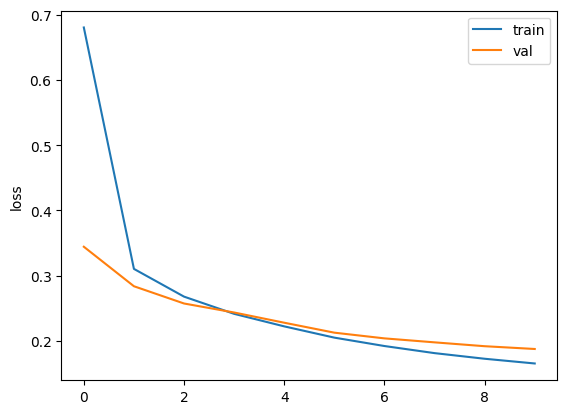

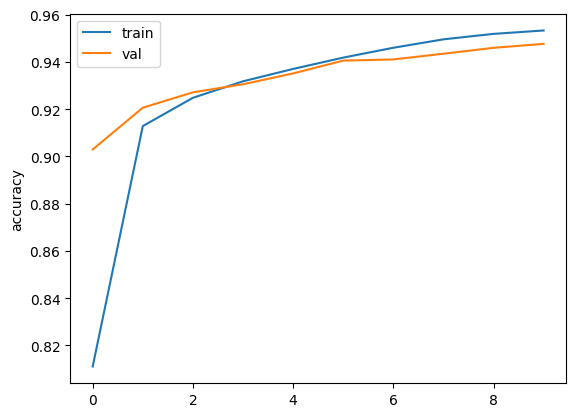

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()


These graphs show that over time the loss decreases for the training and validaton sets. It also shows that accuracy of reading/prediction increases over time for both data sets.

##Running the trained model using the test dataset. Generating and displaying performance statistics.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_image, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9533


1/1 [==============================] - 0s 242ms/step
True: 6
Pred: [6]


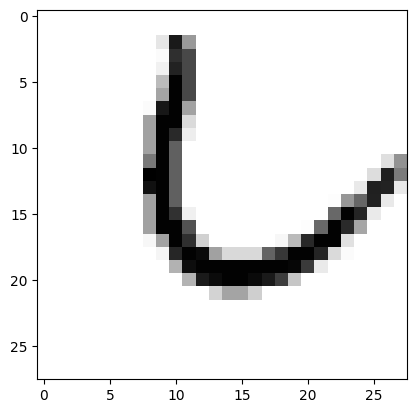

In [ ]:
plt.imshow(train_image[863], cmap='Greys')
pred = model.predict(train_image[863].reshape(1,28,28))

print(f'True: {train_label[863]}')
print('Pred:', np.argmax(pred, axis=-1))

1/1 [==============================] - 0s 123ms/step
True: 2
Pred: [2]


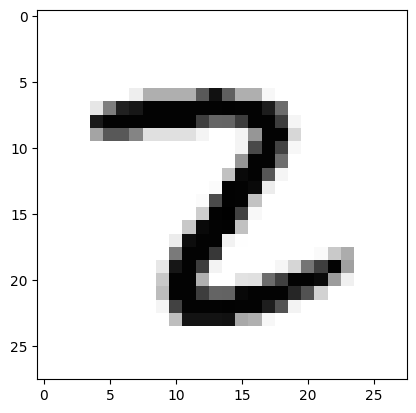

In [ ]:
plt.imshow(train_image[4441], cmap='Greys')
pred = model.predict(train_image[4441].reshape(1,28,28))

print(f'True: {train_label[4441]}')
print('Pred:', np.argmax(pred, axis=-1))

1/1 [==============================] - 0s 40ms/step
True: 9
Pred: [9]


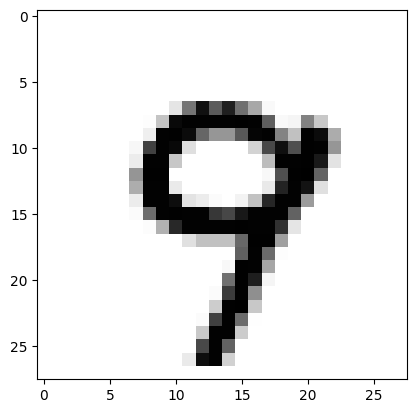

In [ ]:
plt.imshow(train_image[40], cmap='Greys')
pred = model.predict(train_image[40].reshape(1,28,28))

print(f'True: {train_label[40]}')
print('Pred:', np.argmax(pred, axis=-1))